### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

### Loading Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
type(y_train)

numpy.ndarray

### Finding no. of output labels

In [6]:
len(set(y_train)), len(set(y_test))

(10, 10)

### visualizing images

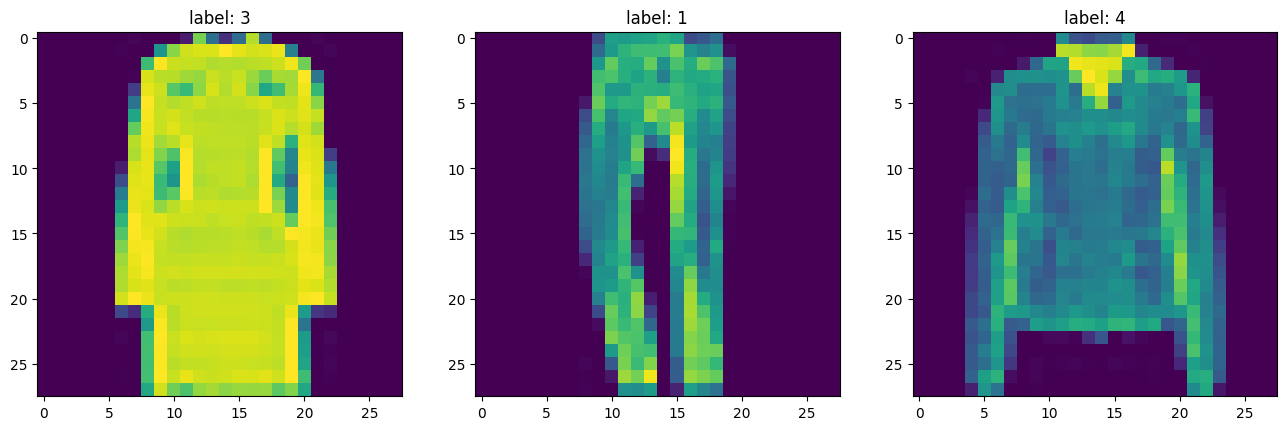

In [8]:
plt.figure(figsize=(16,9))

plt.subplot(1,3,1)
plt.imshow(X_train[500])
plt.title(f"label: {y_train[500]}")
plt.subplot(1,3,2)
plt.imshow(X_train[1500])
plt.title(f"label: {y_train[1500]}")

plt.subplot(1,3,3)
plt.imshow(X_train[5420])
plt.title(f"label: {y_train[5420]}")

plt.show()

### Scaling the Image

In [10]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

#### Creating ANN

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(600, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=15)

C:\Users\Nikhil Vishwakarma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.7917 - loss: 0.5770
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8656 - loss: 0.3613
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8802 - loss: 0.3187
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8904 - loss: 0.2934
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8972 - loss: 0.2764
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8984 - loss: 0.2654
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9056 - loss: 0.2497
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9089 - loss: 0.2377
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9130 - loss: 0.2265
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9179 - loss: 0.2160
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9188 - loss: 0.2096
Epoch 12

In [22]:
model.evaluate(X_train_scaled, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9356 - loss: 0.1639


[0.16639107465744019, 0.9349666833877563]

In [23]:
model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8874 - loss: 0.3740


[0.37985679507255554, 0.8888999819755554]

### Model Training Metrics

In [31]:
accuracy = history.history['accuracy']
loss = history.history['loss']

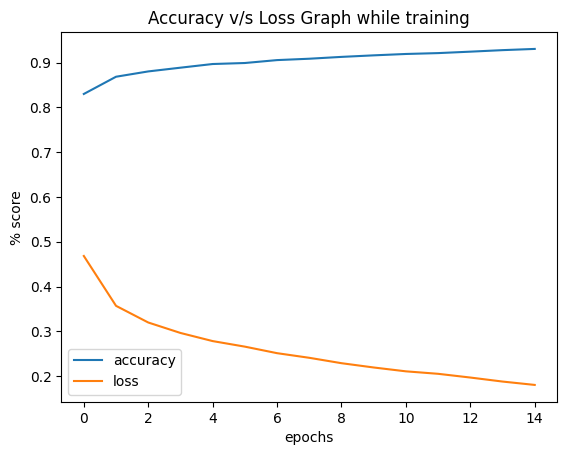

In [41]:
plt.plot(accuracy)
plt.plot(loss)
plt.legend(['accuracy','loss'])
plt.title("Accuracy v/s Loss Graph while training")
plt.xlabel("epochs")
plt.ylabel("% score")
plt.show()

### Predictions

In [44]:
y_pred = model.predict(X_test_scaled)

y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [46]:
y_pred_labels[10:20]

[4, 5, 5, 3, 4, 1, 2, 2, 8, 0]

### Evaluation

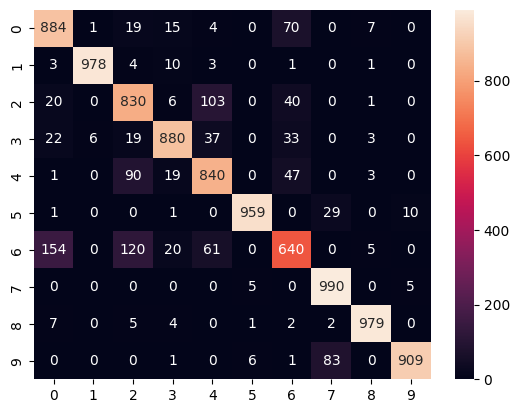

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [59]:
print("***** Classification Report *****")
print(classification_report(y_test, y_pred_labels))

***** Classification Report *****
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.76      0.83      0.80      1000
           3       0.92      0.88      0.90      1000
           4       0.80      0.84      0.82      1000
           5       0.99      0.96      0.97      1000
           6       0.77      0.64      0.70      1000
           7       0.90      0.99      0.94      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.91      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

